# Temporal Correlations

In this notebook we will look at the temporal correlations between FTLEs in L96

In [1]:
# Package Imports

import numpy as np
import numpy.linalg as la
import xarray as xr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### Reading Experiment Data

In [2]:
directory = 'h-Longer-Transient'
h_experiment=[]
for i in tqdm(range(1, 6)):
    ds = xr.open_mfdataset(directory + f'/{i}/step5/*.nc', parallel=True, combine='by_coords', concat_dim='time')
    h_experiment.append(ds)

## Calculating Integrated Correlation Time

Here we follow Billingsley to calculate the integrated correlation time.

In [3]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

def autocorr_series(time_series, lags):
    """
    Returns list of autocorrelation for a list of lags
    """
    autocorrs = [np.corrcoef(time_series)]
    for lag in lags:
            ac = autocorr(time_series, lag)[1,0]
            autocorrs.append(ac)
    return autocorrs

def integrated_autocorr(time_series, lags, dx):
    """
    Returns integrated autocorrelation. x-axis of integration is lag series.
    """
    auto_correlations = autocorr_series(time_series, lags)
    return np.trapz(auto_correlations, dx=dx)

In [12]:
# Unpacking xarray

le_indices = [1, 2, 3, 200, 205, 210, 390, 393, 396]

ftcles = [ds.ftcle.sel(le_index = index).dropna(dim='time').values for index in le_indices]

dt = ds.tau # Time between datapoints

In [13]:
# Calculating Autocorrelation function
lags = np.arange(1, 500, 1)
correlations = [autocorr_series(ftcle, lags) for ftcle in ftcles]

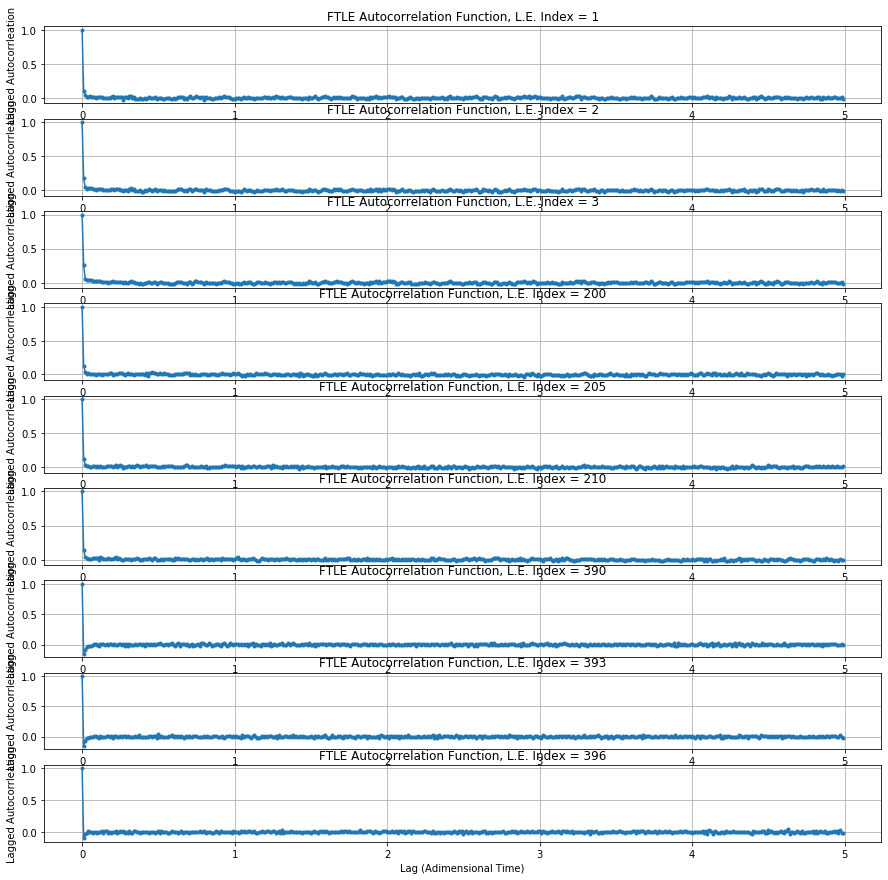

In [20]:
# Plotting Autocorrelation Functions

fig, axes = plt.subplots(len(le_indices), 1, figsize = (15, 15))

for i, (correlation, ax) in enumerate(zip(correlations, axes)):
    time_points = dt * np.hstack((0, lags))
    ax.plot(time_points, correlation, '.-')
    ax.set_ylabel('Lagged Autocorrleation')
    ax.set_xlabel('Lag (Adimensional Time)')
    ax.set_title(f'FTLE Autocorrelation Function, L.E. Index = {le_indices[i]}')
    ax.grid()

fig.savefig('Autocorrelations-L96.png', dpi=1200)
fig.show()

In [21]:
# Estimating Integrated Autocorrelation

integrated_autocorrs = [integrated_autocorr(ftle, lags, dt) for ftle in ftcles]

In [22]:
for i, iac in enumerate(integrated_autocorrs):
    print(f'For L.E. index {le_indices[i]} the i.a.c. is {iac:.3f}') 

For L.E. index 1 the i.a.c. is 0.011
For L.E. index 2 the i.a.c. is 0.004
For L.E. index 3 the i.a.c. is 0.004
For L.E. index 200 the i.a.c. is 0.004
For L.E. index 205 the i.a.c. is 0.009
For L.E. index 210 the i.a.c. is 0.023
For L.E. index 390 the i.a.c. is 0.003
For L.E. index 393 the i.a.c. is 0.002
For L.E. index 396 the i.a.c. is 0.006
